# MNIST Double Layer CNN Classification

Note: This notebook is desinged to run with GPU runtime.

####[CNN-01]
Import modules and set a random seed.

In [1]:
import os, random
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

random.seed(20230514)
np.random.seed(20190213)
tf.random.set_seed(20250215)

####[CNN-02]
Download the MNIST dataset and store into NumPy arrays.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


####[CNN-03]
Define a CNN model with a single convolutional filter layer.

In [3]:
model = models.Sequential(name='CNN_double_layer_model')
model.add(layers.Input(shape=(28*28,), name='input'))
model.add(layers.Reshape((28, 28, 1), name='reshape'))
model.add(layers.Conv2D(32, (5, 5), padding='same',
                        use_bias=True, activation='relu',
                        name='conv_filter1'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling1'))
model.add(layers.Conv2D(64, (5, 5), padding='same',
                        use_bias=True, activation='relu',
                        name='conv_filter2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling2'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu', name='hidden'))
model.add(layers.Dropout(rate=0.5, name='dropout'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "CNN_double_layer_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_filter1 (Conv2D)                │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1 (MaxPooling2D)          │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_filter2 (Conv2D)                │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2 (MaxPooling2D)          │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,274,634 (12.49 MB)

 Trainable params: 3,274,634 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

####[CNN-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

####[CNN-05]
Train the model. It achieves over 99% accuracy.

In [5]:
%%time
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.8881 - loss: 0.3527 - val_acc: 0.9824 - val_loss: 0.0553
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9839 - loss: 0.0510 - val_acc: 0.9873 - val_loss: 0.0379
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9881 - loss: 0.0355 - val_acc: 0.9916 - val_loss: 0.0253
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.9923 - loss: 0.0252 - val_acc: 0.9915 - val_loss: 0.0253
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9934 - loss: 0.0196 - val_acc: 0.9905 - val_loss: 0.0289
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9954 - loss: 0.0164 - val_acc: 0.9917 - val_loss: 0.0262
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9952 - loss: 0.0140 - val_acc: 0.9928 - val_loss: 0.0247
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.9964 - loss: 0.0113 - val_acc: 0.9924 - val_loss: 0.0271
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - 

####[CNN-06]
Plot chars for accuracy and loss values.

<Axes: >

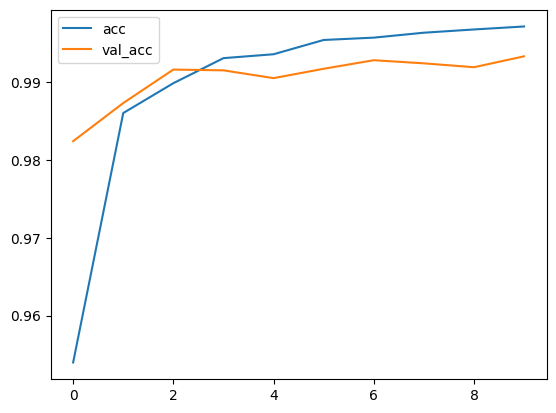

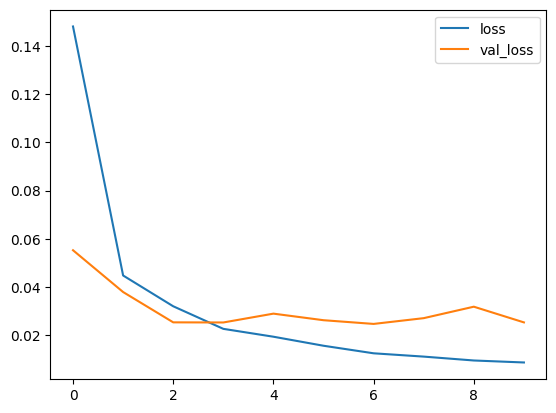

In [6]:
DataFrame({'acc': history.history['acc'],
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'],
           'val_loss': history.history['val_loss']}).plot()

####[CNN-07]
Mount your Google Drive on `/content/gdrive`.

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


####[MDF-08]
Export the trained model as a file `MNIST_double.hd5` on your Google Drive.

In [8]:
model.save('/content/gdrive/My Drive/MNIST_double.keras')
!ls -lh '/content/gdrive/My Drive/MNIST_double.keras'

-rw------- 1 root root 38M Feb 16 03:51 '/content/gdrive/My Drive/MNIST_double.keras'
